In [1]:
import os
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB

from src.preprocess import pre_process

[nltk_data] Downloading package stopwords to /home/gui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gui/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [72]:
X, y, vectorizer = pre_process('dataset/train.csv',
                                 data = 'train',
                                 vectorizer = 'tfidf',
                                 max_features = None)


cleaning...
vectorizing...
done!


In [73]:
clf = MultinomialNB(0.1)
cross_scores = cross_val_score(clf, X, y, cv=5)

In [74]:
cross_scores.mean()

0.7928

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=11)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val).astype(int)
y_val = y_val.astype(int)

In [6]:
cm = confusion_matrix(y_val, y_pred, normalize='true')

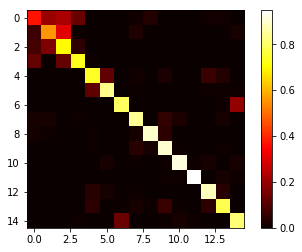

In [7]:
plt.imshow(cm, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [8]:
np.diagonal(cm)

array([0.37078652, 0.55789474, 0.70103093, 0.73504274, 0.74157303,
       0.83695652, 0.79646018, 0.84466019, 0.89908257, 0.9010989 ,
       0.91666667, 0.94736842, 0.88297872, 0.78      , 0.81481481])

In [9]:
parameters = {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
mnb = MultinomialNB()
clf = GridSearchCV(mnb, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
clf.cv_results_

{'mean_fit_time': array([0.55831943, 0.53846374, 0.53601856, 0.53606172, 0.53835793,
        0.5414537 , 0.54500136, 0.53683262, 0.53632917, 0.54014659]),
 'mean_score_time': array([0.0359087 , 0.03426676, 0.03344989, 0.03362379, 0.03478026,
        0.03387318, 0.03416643, 0.03348689, 0.03456373, 0.0337008 ]),
 'mean_test_score': array([0.77883333, 0.78016667, 0.77966667, 0.78183333, 0.78183333,
        0.78166667, 0.7805    , 0.78016667, 0.78      , 0.77916667]),
 'param_alpha': masked_array(data=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  {'alpha': 0.2},
  {'alpha': 0.3},
  {'alpha': 0.4},
  {'alpha': 0.5},
  {'alpha': 0.6},
  {'alpha': 0.7},
  {'alpha': 0.8},
  {'alpha': 0.9},
  {'alpha': 1}],
 'rank_test_score': array([10,  5,  8,  1,  1,  3,  4,  6,  7,  9], dtype=int32),
 'split0_test

In [23]:
scores = []
for features in range (4000, 7001, 500):
    X_train, X_val, y_train, y_val, vectorizer = pre_process('dataset/train.csv',
                                                         data = 'train',
                                                         vectorizer = 'tfidf',
                                                         max_features = features)
    X = np.concatenate((X_train,X_val), axis=0)
    y = np.concatenate((y_train,y_val), axis=0)
    
    for alpha in range(4, 6, 1):
        mnb = MultinomialNB(alpha*0.1)
        scores.append((features, alpha, cross_val_score(mnb, X, y, cv=5).mean()))

cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!


In [24]:
scores

[(4000, 4, 0.7837333333333334),
 (4000, 5, 0.7829333333333334),
 (4500, 4, 0.7864),
 (4500, 5, 0.7847999999999999),
 (5000, 4, 0.7872),
 (5000, 5, 0.7851999999999999),
 (5500, 4, 0.7864000000000001),
 (5500, 5, 0.7851999999999999),
 (6000, 4, 0.7851999999999999),
 (6000, 5, 0.7856000000000001),
 (6500, 4, 0.7865333333333334),
 (6500, 5, 0.7854666666666666),
 (7000, 4, 0.7869333333333333),
 (7000, 5, 0.7868)]

In [25]:
max(scores, key=lambda item: item[2])

(5000, 4, 0.7872)

In [3]:
X_train, X_val, y_train, y_val, vectorizer = pre_process('dataset/train.csv',
                                                         data = 'train',
                                                         vectorizer = 'tfidf',
                                                         max_features = 5000)
X = np.concatenate((X_train,X_val), axis=0)
y = np.concatenate((y_train,y_val), axis=0)

mnb = MultinomialNB(0.4)
cross_scores = cross_val_score(mnb, X, y, cv=5)

cleaning...
splitting data...
vectorizing...
done!


In [4]:
cross_scores.mean()

0.7872